<a href="https://colab.research.google.com/github/JavierArevalo/OptionPricing/blob/main/CompleteBlackScholesAndMonteCarloOptionsPricing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This file retreives the necessary options data and then compares two modeling prices and their weaknesses: Stock Scholes Options Pricing and Options Pricing via Monte Carlo Simulation 

Scrape Python file that retrieves options data necessary for pricing 

In [ ]:
pip install yahoo_fin

     |████████████████████████████████| 81 kB 5.2 MB/s 
     |████████████████████████████████| 83 kB 2.2 MB/s 
     |████████████████████████████████| 112 kB 42.3 MB/s 
     |████████████████████████████████| 127 kB 56.5 MB/s 
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=be3df75cbb87f3f08eba7c8254cc9ba6943cfaa4d5963c0d0252e19ddaaad750
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24591 sha256=54888ec8d3ea67ff919c8aeeb39f05685e2cf6c7b4865b53e21aed674b09ae11
  Stored in directory: /root/.cache/pip/wheels/9c/aa/cc/f2228050ccb40f22144b073f15a2c84f11204f29fc0dce028e
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6066 sha256=7ac044c6aa3eead49df03af9d6e78fd6fb67d5c793a56a52024b1616486ffefa
  Stored in directory: /root/.cache/pip/wheels/73/ad/a4/0dff4a6ef231fc0dfa12ffbac2a36ce

In [93]:
from yahoo_fin import options
from yahoo_fin import stock_info as si
import pandas as pd

class Option:
    def __init__(self, ticker):

        Option = options.get_options_chain(ticker)
        dates = options.get_expiration_dates(ticker)
        #print(Option)
        #print(dates)
        data = Option['calls']
        df = pd.DataFrame.from_dict(data)

        Option = df
        

        self.ticker = ticker
        self.S = si.get_live_price(ticker)
        self.K = Option.iloc[0]["Strike"]
        self.R = Option.iloc[0]["Open Interest"]
        self.V = Option.iloc[0]["Implied Volatility"]
        self.B = Option.iloc[0]["Bid"]
        self.A = Option.iloc[0]["Ask"]
        self.T = dates[0]
    
    def getOptionsData(self, ticker=None):
        if (ticker is None):
            ticker = self.ticker 
        
        dates = options.get_expiration_dates(ticker)
        #OptionData = []
        #for date in dates: 
          #option_data = options.get_calls(ticker, date)
          #option_data.append(date)
          #OptionData.append(option_data)
        
        optionData = options.get_options_chain(ticker)

        return optionData, dates
    def getDataForDate(self, ticker, date):
      return options.get_calls(ticker, date)

Financial Data API Class:

In [94]:
import requests 
import json 
import pandas as pd 

class FinancialDataAPI: 

  def __init__(self, ticker):
    self.ticker = ticker 
    self.access_key = 'ef7d7d5ef00d2cc85d76913392c86b94'
    self.baseRequestURL = 'https://api.marketstack.com/v1/tickers'
    #don't forget to add url part of /eod after /'ticker
  
  def getPrices(self, ticker):
    self.ticker = (str(ticker)).lower()
    params = {
        "access_key": self.access_key,
    }
    
    completeURL = self.baseRequestURL + '/' + str(self.ticker) + '/eod'
    api_result = requests.get(completeURL, params)
    api_response = api_result.json()

    print("API Response")
    print(api_response)
    print("")

    processedPrices = self.processPrices(api_response)

    #Turn from nested json into list of single json entries and then list to pandas dataframe
    df = pd.DataFrame.from_dict(processedPrices)

    print("Data Frame: ")
    print(df)
    print("")

    return df
  
  def getPriceForDay(self, ticker, date):
    print("")
    print("Date")
    print(date)
    print("")
    print("")
    #Date needs to be in YYYY-MM-DD format
    self.ticker = (str(ticker)).lower()
    params = {
        "access_key": self.access_key,
    }
    completeURL = self.baseRequestURL + '/' + str(self.ticker) + '/eod/[' + str(date) + ']'
    api_result = requests.get(completeURL, params)
    api_response = api_result.json() 

    print("API Response")
    print(api_response)
    print("")

    processedPrices = self.processPrices(api_response)

    df = pd.DataFrame.from_dict(processedPrices)

    print("")
    print(df)
    print("")

    return df 
  
  def processPrices(self, priceData):

    data = priceData['data']
    name = data['name']
    ticker = data['symbol']
    prices = data['eod']

    listPrices = []
    for idx, row in enumerate(prices):
      dictCur = {}
      date = row['date']
      price = row['close']
      high = row['high']
      low = row['low']
      volume = row['volume']

      dictCur['Date'] = str(date)
      dictCur['Close'] = price 
      dictCur['Volume'] = volume 
      dictCur['High'] = high 
      dictCur['Low'] = low
      
      listPrices.append(dictCur)
    return listPrices

Black Scholes Formula for Non Dividend Paying Stock:



Formula for put and call is as follows:

Call = S0* N* (d1) - N(d2)* K* e^(-rT)

Put = N(-d2) * K * e^(-rT) - N(-d1)* S0

where 

d1 = (ln(S/K) + T *(r + (o^2)/2)) / (o* sqrt(T)

d2 = d1 - o* sqrt(T)

where:

S: current asset/stock price

K: strike price of the option 

r: risk free rate 

T: time until option experation 

o: annualized volatility of the asset's returns 

N(x): the cumulative distribution function for a standard distribution




In [95]:
import numpy as np 
from scipy.stats import norm 

N = norm.cdf 

def BS_CALL(S, K, T, r, sigma):
  d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
  d2 = d1 - sigma * np.sqrt(T)
  return S * N(d1) - K * np.exp(-r*T) * N(d2)

def BS_PUT(S, K, T, r, sigma):
  d1 = (np.log(S/K) + (r + sigma**2/2)* T) / (sigma * np.sqrt(T))
  d2 = d1 - sigma* np.sqrt(T)
  return K*np.exp(-r*T)*N(-d2) - S*N(-d1)

*Analyzing Effects of different factors on Option Value *

S Effect on Option Value:

-Here will hold constant all the variables except the current stock price S and examine how the value of calls and puts change accordingly 

<function matplotlib.pyplot.legend>

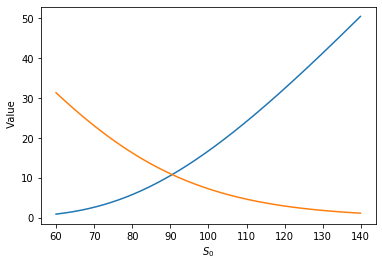

In [96]:
import matplotlib.pyplot as plt

K = 100
r = 0.1
T = 1
sigma = 0.3

S = np.arange(60, 140, 0.1)

calls = [BS_CALL(s, K, T, r, sigma) for s in S]
puts = [BS_PUT(s, K, T, r, sigma) for s in S]

#Plot the values and compare 
plt.plot(S, calls, label='Call Value')
plt.plot(S, puts, label='Put Value')
plt.xlabel('$S_0$')
plt.ylabel(' Value')
plt.legend

Sigma Effect on Black Scholes Value 

When we hold all other variables constant, and increase the volatility parameter, both calls and puts increase in value. 

Tend to increase in a linear fashion too. 


To understand why the calls value seems to be strictly greater than the put with respect to volatility, change interest rate r to 0 and notice that the curves coincide exactly. 

Rather than making plots for effects on interest rate, can deduce that an increase in interest rates increases the value of calls and decreases the value of puts. 

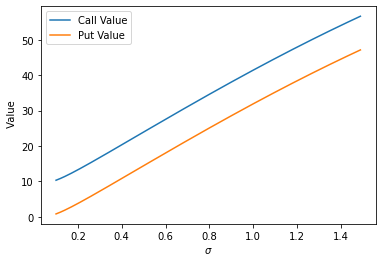

In [97]:
K = 100
r = 0.1
T = 1 
Sigmas = np.arange(0.1, 1.5, 0.01)
S = 100

calls = [BS_CALL(S, K, T, r, sig) for sig in Sigmas]
puts = [BS_PUT(S, K, T, r, sig) for sig in Sigmas]

plt.plot(Sigmas, calls, label = 'Call Value')
plt.plot(Sigmas, puts, label = 'Put Value')
plt.xlabel('$\sigma$')
plt.ylabel(' Value')
plt.legend()


Effect of Time on Black Scholes Price


As we increase time we increase the uncertainty regarding the future price. 

KEY: Uncertainty is to the options holder benefit (why?)

As a result the price of the option increases with time. 


Again we can see that when the interest rate is 0 we observe that the difference between puts and calls is eliminated. 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


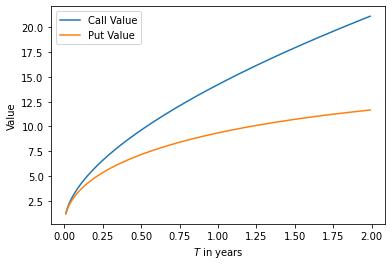

In [98]:
K = 100
r = 0.05
T = np.arange(0, 2, 0.01)
sigma = 0.3
S = 100

calls = [BS_CALL(S, K, t, r, sigma) for t in T]
puts = [BS_PUT(S, K, t, r, sigma) for t in T]
plt.plot(T, calls, label = 'Call Value')
plt.plot(T, puts, label = 'Put Value')
plt.xlabel('$T$ in years')
plt.ylabel('Value')
plt.legend()

**Limitations of Black Scholes: **

Main Problem with Black Scholes 

Script below calculates the rolling standard deviaton for APPLE over approximately 10 years. 


Notice that the volatility is in no way stable which is why implied volatility is so handy. 


If we take the standard deviation over the entire sample it is approximately 0.28. However, can notice that in early-mid 2020 there is a large spike. 


As mentioned before, Black Scholes model assumes this paramter is constant when in fact it is not further reinforcing the imporatance of using implied volatility. 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


API Response
{'pagination': {'limit': 100, 'offset': 0, 'count': 100, 'total': 2516}, 'data': {'name': 'Apple Inc', 'symbol': 'AAPL', 'country': None, 'has_intraday': False, 'has_eod': True, 'eod': [{'open': 163.92, 'high': 166.6, 'low': 163.57, 'close': 165.07, 'volume': 68896600.0, 'adj_high': None, 'adj_low': None, 'adj_close': 165.07, 'adj_open': None, 'adj_volume': None, 'split_factor': 1.0, 'dividend': 0.0, 'symbol': 'AAPL', 'exchange': 'XNAS', 'date': '2022-04-18T00:00:00+0000'}, {'open': 170.62, 'high': 171.27, 'low': 165.04, 'close': 165.29, 'volume': 75237500.0, 'adj_high': None, 'adj_low': None, 'adj_close': 165.29, 'adj_open': None, 'adj_volume': None, 'split_factor': 1.0, 'dividend': 0.0, 'symbol': 'AAPL', 'exchange': 'XNAS', 'date': '2022-04-14T00:00:00+0000'}, {'open': 167.39, 'high': 171.04, 'low': 166.77, 'close': 170.4, 'volume': 70551700.0, 'adj_high': None, 'adj_low': None, 'adj_close': 170.4, 'adj_open': None, 'adj_volume': None, 'split_factor': 1.0, 'dividend': 0.

Text(0.5, 1.0, 'AAPL Rolling Volatility ')

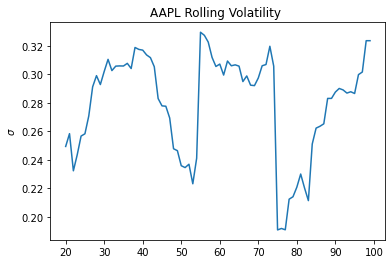

In [99]:
import pandas_datareader.data as web 
import pandas as pd 
import datetime as dt 
import numpy as np 
import matplotlib.pyplot as plt 
#import FinancialDataAPI as financialAPI



start = dt.datetime(2010, 1, 1)
end = dt.datetime(2020, 10, 1)

start = pd.to_datetime(['2010-01-01']).astype(int)[0]//10**9 # convert to unix timestamp.
end = pd.to_datetime(['2020-10-01']).astype(int)[0]//10**9 # convert to unix timestamp.


symbol = 'AAPL'
source = 'yahoo'

_financialAPI = FinancialDataAPI(symbol)

data = _financialAPI.getPrices(symbol)

data['change'] = data['Close'].pct_change()
data['rolling_sigma'] = data['change'].rolling(20).std() * np.sqrt(225)

data.rolling_sigma.plot()
plt.ylabel('$\sigma$')
plt.title('AAPL Rolling Volatility ')

Another key problem is that the model underestimates the tail density:

The KDE plot below shows the emprical versus a normal distribution for Apple stock. This means that Black Scholes will underestimate the value of out-of-the-money options.

Text(0, 0.5, 'Density')

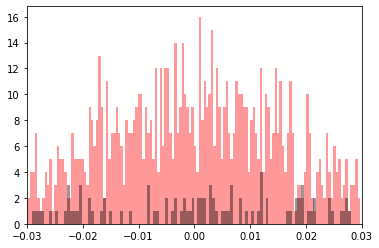

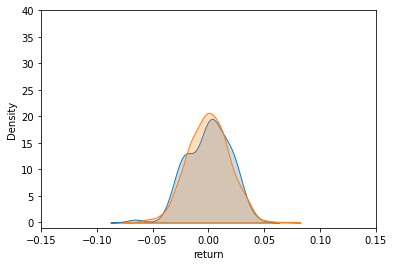

In [100]:
std = data.change.std()
Ndraws = 1000
WT = np.random.normal(data.change.mean(), std, size=Ndraws)

plt.hist(np.exp(WT)-1, bins = 300, color = 'red', alpha = 0.4);
plt.hist(data.change, bins = 200, color = 'black', alpha = 0.4);
plt.xlim([-0.03, 0.03])

import seaborn as sns 

fix, ax = plt.subplots()
ax = sns.kdeplot(data=data['change'].dropna(), label='Empirical', ax=ax, shade=True)
ax = sns.kdeplot(data=WT, label = 'Log Normal', ax=ax, shade=True)
plt.xlim([-0.15, 0.15])
plt.ylim([-1, 40])
plt.xlabel('return')
plt.ylabel('Density')

Black Scholes for Dividend Paying Stock


Can easily modify the non-dividend formula described above to include a dividend. 

Note that the dividend denoted as q below is a continously compounded dividend. 

This means that the actual dividend rate is irrelevant to the pricing formula. This is not ideal and could result in large errors for stocks which pays large dividends. 

Call and put modified equations are as follows:


Call = S0 * e^(-qT) * N(d1) - N(d2) * K * e^(-rT)

Put = N(-d2) * K * e^(-rT) - N(-d1) * S0 * e^(-qT) 

where d1 and d2 are as follows:

d1 = (ln(S/K) + (r - q + (o^2)/2)) / (o * sqrt(T)) 

d2 = d1 - o * sqrt(T) 

In [101]:
def BS_CALLDIV(S, K, T, r, q, sigma):
  d1 = (np.log(S/K) + (r - q + sigma**2/2)*T) / (sigma*np.sqrt(T))
  d2 = d1 - sigma * np.sqrt(T)
  return S*np.exp(-q*T) * N(d1) - K * np.exp(-r*T) * N(d2)

def BS_PUTDIV(S, K, T, r, q, sigma):
  d1 = (np.log(S/K) + (r - q + sigma**2/2)* T) / (sigma*np.sqrt(T))
  d2 = d1 - sigma * np.sqrt(T)
  return K * np.exp(-r*T)*N(-d2) - S*np.exp(-q*T) * N(-d1)
  

Concise Object Oriented Implementation

In [102]:
from scipy.stats import norm 

class BsOption:
  def __init__(self, S, K, T, r, sigma, q=0):
    self.S = S
    self.K = K
    self.T = T
    self.r = r 
    self.sigma = sigma 
    self.q = q 
  
  @staticmethod 
  def N(x):
    return norm.cdf(x)
  
  @property
  def params(self):
    return {'S': self.S, 
            'K': self.K, 
            'T': self.T, 
            'r': self.r, 
            'q': self.q, 
            'sigma': self.sigma}
  
  def d1(self):
    return (np.log(self.S/self.K) + (self.r - self.q + self.sigma**2/2)*self.T) / (self.sigma*np.sqrt(self.T))

  def d2(self):
    return self.d1() - self.sigma*np.sqrt(self.T)
  
  def _call_value(self):
    return self.S * np.exp(-self.q*self.T) * self.N(self.d1()) - self.K * np.exp(-self.r*self.T) * self.N(self.d2())
  
  def _put_value(self):
    return self.K*np.exp(-self.r*self.T) * self.N(-self.d2()) - self.S * np.exp(-self.q*self.T) * self.N(-self.d1())

  def price(self, type_ = 'C'):
    if type_ == 'C':
      return self._call_value()
    if type_ == 'P':
      return self._put_value()
    if type_ == 'B':
      return {'call': self._call_value(), 'put': self._put_value()}
    else:
      #raise ValueError('Unrecognized type')
      return None



if __name__ == '__main__':
  K = 100
  r = 0.1
  T = 1
  sigma = 0.3
  S = 100
  print(BsOption(S, K, T, r, sigma).price('B'))

{'call': 16.73413358238666, 'put': 7.217875385982609}


Now Simulate the Option prices using the factors data (Strike Price, Asset Price, Volatility (use implied volatility, interest rate, time to expiry) to calculate the option price using Black Scholes 

In [108]:
#Get Data for ticker AAPL 
from datetime import datetime
from datetime import timedelta

from yahoo_fin import stock_info as si 

ticker = "NFLX"

_scraper = Option(str(ticker))
_financialAPI = FinancialDataAPI(ticker)

optionsData, dates = _scraper.getOptionsData(ticker)
print("Options Data")
print(optionsData)
print("")
print("")
print("Dates")
print(dates)
print(len(dates))

date = dates[2]
_dataForDate = _scraper.getDataForDate(ticker, date)
print("")
print("")
print("Data For Date: " + str(date) + " is: ")
print(_dataForDate)

#Calculate difference between ask and between bid 

#Options for Netflix 
BidDiff = 0
AskDiff = 0
for date in dates: 
  optionData = _scraper.getDataForDate(ticker, date)
  for index, row in optionData.iterrows():
    #Calculate black scholes price 
    bid = row['Bid']
    ask = row['Ask']
    Date = str(row['Last Trade Date'])
    Date = Date[0:10]
    #datetime = datetime.strptime(Date, 'YYYY-MM-DD')
    #datetime = datetime(Date)
    #dateCF = datetime.isoformat()
    #print("Date")
    #print(Date)
    #print("")
    split = date.split()
    month = datetime.strptime(split[0], "%B").month
    day_number = split[1].split(',')
    day_number = day_number[0]
    year = split[2]
    first = datetime.datetime(year=int(year), month=month, day=int(day_number))
    #date = datetime.strptime(date, '%MMMM %d, %Y')
    #print(date)
    datetime = datetime.strptime(Date, '%Y-%m-%d')
    datetimeOG = datetime
    #datetime = datetime + datetime.timedelta(days=2)
    datetime += timedelta(days=1)
    #print(datetime)
    assetPrice = si.get_data(ticker, start_date = Date, end_date = datetime)['close']
    print(assetPrice)
    #assetPrice = _financialAPI.getPriceForDay(ticker, dateCF)
    
    
    S = row['Strike']
    K = assetPrice
    timeDiff = first -  datetimeOG
    T = (timeDiff.days + timeDiff.seconds/86400)/365.2425

    r = row['Open Interest']
    sigma = str(row['Implied Volatility'])[:-1]
    sigma = float(sigma)/100
    #BS_CALL(S, K, T, r, sigma):

    blackScholesPrice = BS_CALL(float(S), float(K), float(T), float(r), float(sigma))
    BidDiff = BidDiff + abs(blackScholesPrice - bid)
    AskDiff = AskDiff + abs(blackScholesPrice - ask)



Options Data
{'calls':           Contract Name         Last Trade Date  Strike  Last Price     Bid  \
0   NFLX220422C00200000   2022-04-19 9:37AM EDT   200.0      136.70  146.30   
1   NFLX220422C00230000  2022-04-11 10:57AM EDT   230.0      117.65  116.00   
2   NFLX220422C00250000  2022-04-19 11:25AM EDT   250.0       98.10   97.80   
3   NFLX220422C00255000  2022-04-18 12:06AM EDT   255.0       94.63   91.85   
4   NFLX220422C00260000   2022-04-19 2:21PM EDT   260.0       87.95   87.40   
..                  ...                     ...     ...         ...     ...   
77  NFLX220422C00580000   2022-04-19 1:58PM EDT   580.0        0.02    0.00   
78  NFLX220422C00590000   2022-04-19 1:23PM EDT   590.0        0.01    0.00   
79  NFLX220422C00600000   2022-04-19 2:24PM EDT   600.0        0.01    0.00   
80  NFLX220422C00610000   2022-04-19 2:48PM EDT   610.0        0.01    0.00   
81  NFLX220422C00620000   2022-04-19 2:49PM EDT   620.0        0.01    0.00   

       Ask  Change  % Change

AttributeError: ignored